[COVID-surge](https://github.com/dpploy/covid-surge) [https://github.com/dpploy/covid-surge] : V. F. de Almeida **14May20**

## Countries COVID-19 Surge Period Analysis

$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

---
### Table of Contents<a id="toc"></a>
 - [1) Introduction.](#intro)
 - [2) Import COVID-19 data.](#data)
 - [3) Configure run.](#config)
 - [4) Fit model to data.](#fit)
 - [5) Analysis.](#analysis)
---

## [Introduction](#toc)<a id="intro"></a>

On-line COVID-19 data is used in this notebook, and a fit to the sigmoid function 
    
\begin{equation*}
\boxed{ f(t) = \frac{\alpha_0}{1 + \alpha_1\, e^{\alpha_2\,t} } }
\end{equation*}
   
is systematically made. The time between points where the function has maximum and minimum curvature is computed and reported as the **surge period**. This period is relevant to public health officials to decide how long measures to control the epidemic should be in place. In addition, the surge period provides insight in comparing how different communities react to the epidemic.

In [1]:
'''Load the covid-surge package'''
#!pip install --upgrade --quiet covid-surge

from covid_surge import Surge
%matplotlib inline

## [Import Data](#toc)<a id="data"></a>



In [2]:
'''Import data'''

# Get global surge data
g_surge = Surge('global')

print('# of countries: ',len(g_surge.names))
print('# of days:      ',g_surge.dates.shape[0])

# of countries:  188
# of days:       121


## [Configure Run](#toc)<a id="config"></a>

In [3]:
'''Set parameters'''

g_surge.end_date = '4/20/20'   # set end date wanted
g_surge.end_date = None        # get all the data available
g_surge.ignore_last_n_days = 2 # allow for data repo to be corrected/updated
g_surge.min_n_cases_abs = 2500  # min # of absolute cases for analysis

## [Fit Data](#toc)<a id="fit"></a>

In [4]:
'''Fit data to model function'''

# Fit data to all states
fit_data = g_surge.multi_fit_data( blocked_list=['China'] )

print('')
for (sort_key,data) in fit_data:
    name = data[0]
    print('%15s: surge period %1.2f [day]'%(name,sort_key))


        Belgium: surge period 18.58 [day]
         France: surge period 18.87 [day]
        Germany: surge period 21.44 [day]
         Turkey: surge period 21.62 [day]
          Spain: surge period 22.09 [day]
 United Kingdom: surge period 22.71 [day]
         Canada: surge period 23.10 [day]
    Netherlands: surge period 23.42 [day]
         Sweden: surge period 24.84 [day]
             US: surge period 25.59 [day]
          Italy: surge period 26.68 [day]
           Iran: surge period 30.08 [day]


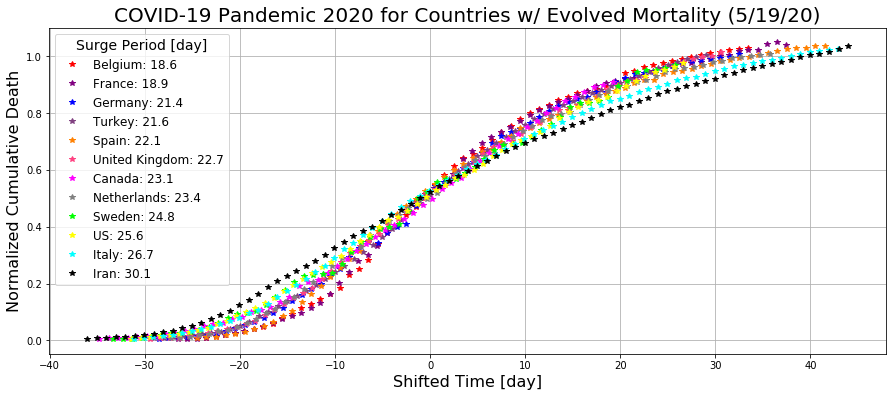

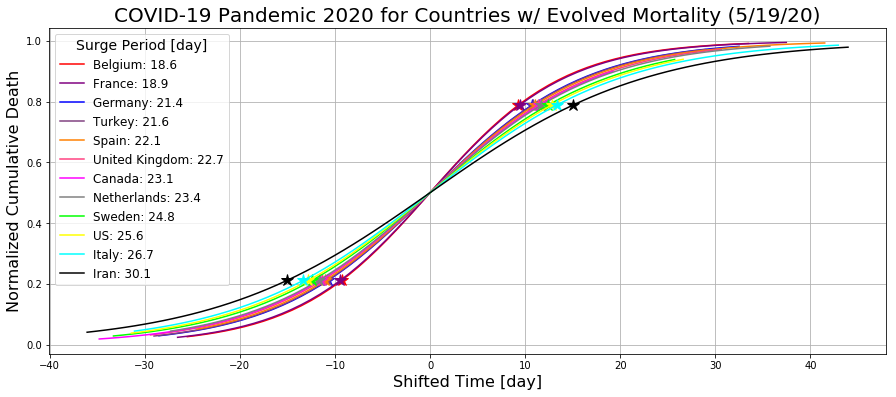

In [5]:
# Plot all data in one plot
g_surge.plot_multi_fit_data( fit_data, 'experimental')
# Plot all fit data in one plot
g_surge.plot_multi_fit_data( fit_data, 'fit' )

## [Analysis](#toc)<a id="analysis"></a>

In [6]:
# Create clustering bins based on surge period
bins = g_surge.clustering(fit_data,2,'surge_period')

print('')
print('*****************************************************************')
print('                             Bins                                ')
print('*****************************************************************')
for k in sorted(bins.keys()):
    print(' Bin %i %s'%(k,bins[k]))

# Use bins to create groups of states based on surge period
country_groups = dict()

for (sort_key,data) in fit_data:
    country = data[0]
    param_vec = data[3]
    tshift = data[4]
    key = g_surge.get_bin_id(sort_key,bins)
    if key in country_groups:
        country_groups[key].append(country)
    else:
        country_groups[key] = list()
        country_groups[key].append(country)


*****************************************************************
                             Bins                                
*****************************************************************
 Bin 0 [18.0, 20.166666666666668]
 Bin 1 [20.166666666666668, 22.333333333333332]
 Bin 2 [22.333333333333332, 24.5]
 Bin 3 [24.5, 26.666666666666664]
 Bin 4 [26.666666666666664, 28.833333333333332]
 Bin 5 [28.833333333333332, 31.0]


In [7]:
# Create state groups

country_groups = [ country_groups[k] for k in
                  sorted(country_groups.keys(),reverse=False) ]

print('')
print('*****************************************************************')
print('                         Country Groups                          ')
print('*****************************************************************')
for g in country_groups:
    print(' Group %i %s'%(country_groups.index(g),g))


*****************************************************************
                         Country Groups                          
*****************************************************************
 Group 0 ['Belgium', 'France']
 Group 1 ['Germany', 'Turkey', 'Spain']
 Group 2 ['United Kingdom', 'Canada', 'Netherlands']
 Group 3 ['Sweden', 'US']
 Group 4 ['Italy']
 Group 5 ['Iran']


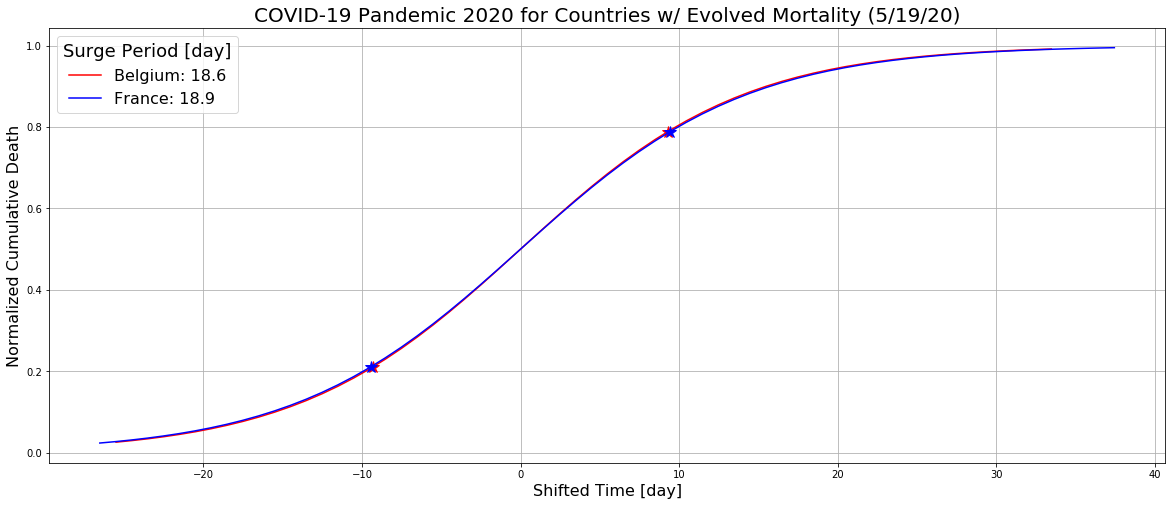

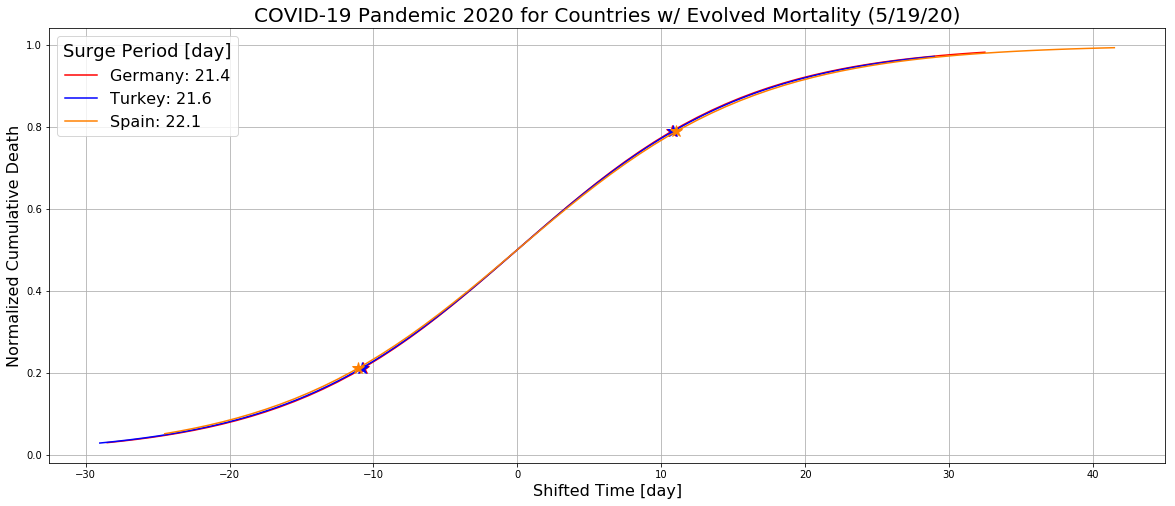

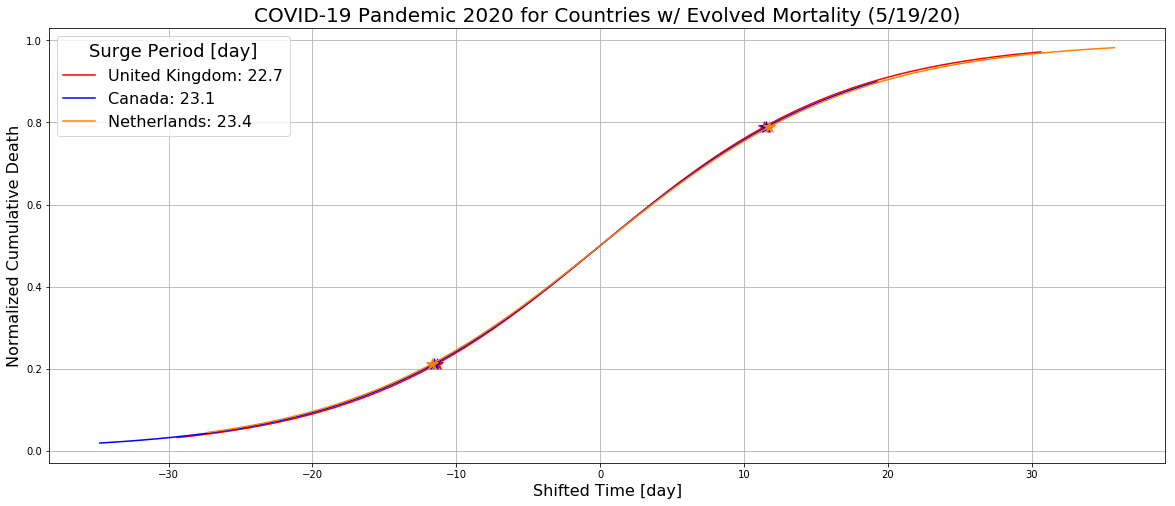

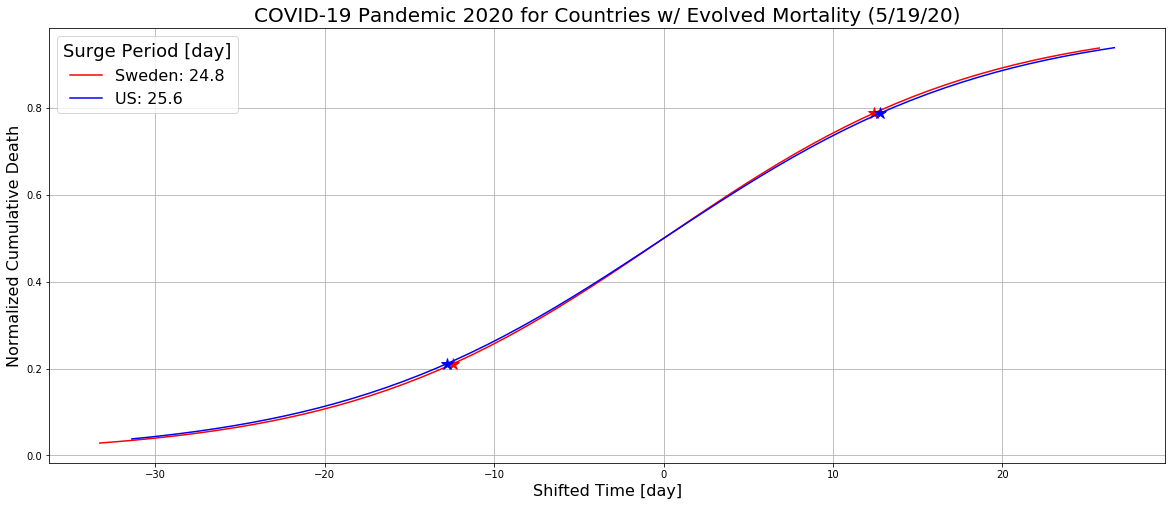

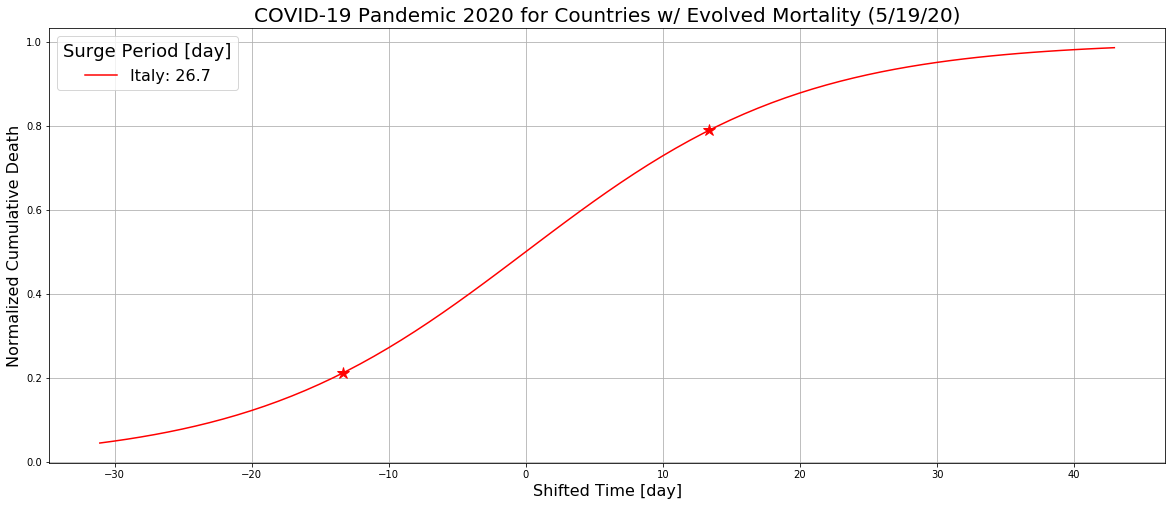

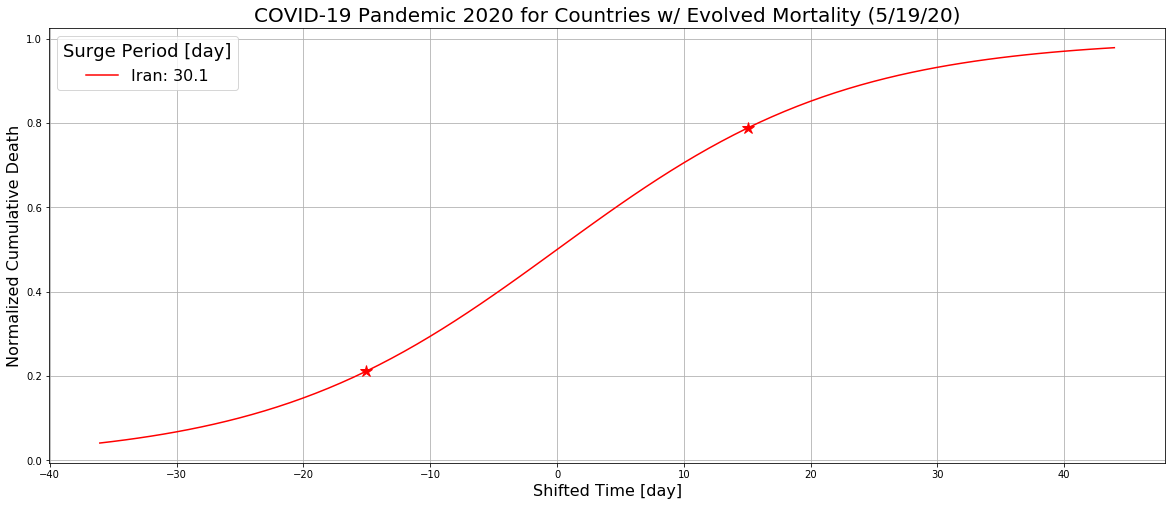

In [8]:
# Plot the normalized surge for groups of states
g_surge.plot_group_fit_data( country_groups, fit_data )

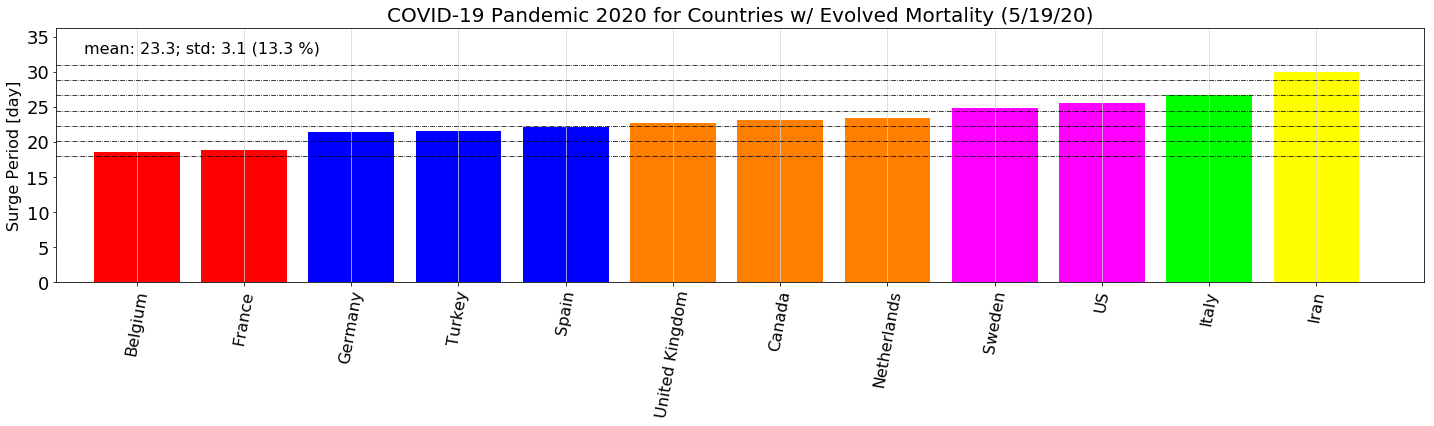

In [9]:
# Plot the surge period for all grouped states
g_surge.plot_group_surge_periods( fit_data, bins )